# Advanced NumPy

In [2]:
import numpy as np

houses = np.array([
    [3, 2000, 10],  # House 1: 3 Bedrooms, 2000 sq ft, 10 years old
    [2, 1500, 20],  # House 2: 2 Bedrooms, 1500 sq ft, 20 years old
    [4, 2500, 5],   # House 3: 4 Bedrooms, 2500 sq ft, 5 years old
])

## Broadcasting

In [3]:
# Broadcast a scalar to add 1 bedroom to each house
updated_bedrooms = houses[:, 0] + 1  # Adding 1 to each bedroom
print("Updated bedrooms after broadcasting:\n", updated_bedrooms)

Updated bedrooms after broadcasting:
 [4 3 5]


In [4]:
# Subtract 5 years from the age of all houses
updated_age = houses[:, 2] - 5
print("Updated house ages after broadcasting:\n", updated_age)

Updated house ages after broadcasting:
 [ 5 15  0]


In [5]:
# Broadcasting with arrays: Adjust size by multiplying all sizes by a factor of 1.1
adjusted_size = houses[:, 1] * 1.1
print("Adjusted house sizes (sq ft) by 10% increase:\n", adjusted_size)

Adjusted house sizes (sq ft) by 10% increase:
 [2200. 1650. 2750.]


## Reshaping

In [6]:
print(houses.shape)

(3, 3)


In [7]:
# Reshape the 3x3 array into a 1D array (flat array)
reshaped_houses = houses.reshape(-1)
print("Reshaped houses (flattened):\n", reshaped_houses)

Reshaped houses (flattened):
 [   3 2000   10    2 1500   20    4 2500    5]


In [8]:
# Reshape into a 1x9 array
reshaped_houses_1x9 = houses.reshape(1, 9)
print("Reshaped houses into 1x9:\n", reshaped_houses_1x9)

Reshaped houses into 1x9:
 [[   3 2000   10    2 1500   20    4 2500    5]]


## Joining arrays

In [9]:
# Create another array for joining purposes
more_houses = np.array([
    [5, 3000, 15],  # House 4: 5 Bedrooms, 3000 sq ft, 15 years old
])

# Join along axis 0 (adding more rows)
joined_houses = np.concatenate((houses, more_houses), axis=0)
print("Joined houses (by rows):\n", joined_houses)

Joined houses (by rows):
 [[   3 2000   10]
 [   2 1500   20]
 [   4 2500    5]
 [   5 3000   15]]


In [10]:
# Join along axis 1 (adding columns)
extra_data = np.array([[100000], [120000], [140000]])
joined_columns = np.concatenate((houses, extra_data), axis=1)
print("Joined houses with extra column (price):\n", joined_columns)

Joined houses with extra column (price):
 [[     3   2000     10 100000]
 [     2   1500     20 120000]
 [     4   2500      5 140000]]


## Stacking arrays

In [11]:
# Stack arrays vertically (row-wise)
stacked_houses_vertically = np.vstack((houses, more_houses))
print("Vertically stacked houses:\n", stacked_houses_vertically)

Vertically stacked houses:
 [[   3 2000   10]
 [   2 1500   20]
 [   4 2500    5]
 [   5 3000   15]]


In [12]:
# Stack arrays horizontally (column-wise)
stacked_houses_horizontally = np.hstack((houses, extra_data))
print("Horizontally stacked houses with extra column:\n", stacked_houses_horizontally)

Horizontally stacked houses with extra column:
 [[     3   2000     10 100000]
 [     2   1500     20 120000]
 [     4   2500      5 140000]]


### Checking data type

In [13]:
# Check the data type of the array
data_type = houses.dtype
print("Data type of the houses array:", data_type)

Data type of the houses array: int32


## Linear algebra

### Matrix multiplication

In [ ]:
houses = np.array([
    [3, 2000, 10],  # House 1: 3 Bedrooms, 2000 sq ft, 10 years old
    [2, 1500, 20],  # House 2: 2 Bedrooms, 1500 sq ft, 20 years old
    [4, 2500, 5],   # House 3: 4 Bedrooms, 2500 sq ft, 5 years old
])

# Define the learned weights for the model: [weight for Bedrooms, weight for Size, weight for Age]
weights = np.array([50, 100, -20])

# Bias term (intercept)
bias = 30000



In [15]:
# Matrix multiplication to predict prices for all houses at once
predicted_prices = np.dot(houses, weights) + bias
print("Predicted prices:", predicted_prices)


Predicted prices: [229950 179700 280100]


### Normalisation calculation

In [16]:
# Normalize features (feature scaling)
house_norms = np.linalg.norm(houses, axis=1, keepdims=True)
normalized_houses = houses / house_norms

# Predict house prices using normalized features
predicted_prices_normalized = np.dot(normalized_houses, weights) + bias
print("Predicted prices (normalized):", predicted_prices_normalized)


Predicted prices (normalized): [30099.97363787 30099.79104138 30100.03967187]


### Single value decomposition

In [17]:
# Perform SVD on the feature matrix
U, S, Vt = np.linalg.svd(houses, full_matrices=False)
print("U matrix:", U)

U matrix: [[-5.65685408e-01 -5.29730785e-05 -8.24621135e-01]
 [-4.24281626e-01 -8.57461456e-01  2.91109864e-01]
 [-7.07096261e-01  5.14548198e-01  4.85030958e-01]]


In [18]:
print("Singular values:", S)

Singular values: [3.53558218e+03 1.45812349e+01 4.84936379e-02]


In [19]:
print("V transpose matrix:", Vt)

V transpose matrix: [[-0.00151998 -0.99998634 -0.00500002]
 [ 0.02353099  0.00496287 -0.99971079]
 [ 0.99972195 -0.00163719  0.02352313]]


Here, $U$ represents the house feature data in an orthogonal space, $S$ contains the singular values, and $Vt$ captures the relationships between the original features.

### Covariance matrix

In [20]:
# Compute covariance matrix of the features
cov_matrix = np.cov(houses, rowvar=False)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 1.00000000e+00  5.00000000e+02 -7.50000000e+00]
 [ 5.00000000e+02  2.50000000e+05 -3.75000000e+03]
 [-7.50000000e+00 -3.75000000e+03  5.83333333e+01]]


Visualising the Covariance matrix

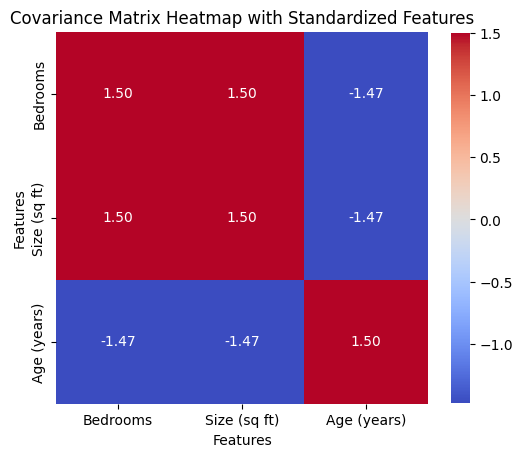

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Define the data array with features for multiple houses: [Bedrooms, Size (sq ft), Age (years)]
houses = np.array([
    [3, 2000, 10],  # House 1: 3 Bedrooms, 2000 sq ft, 10 years old
    [2, 1500, 20],  # House 2: 2 Bedrooms, 1500 sq ft, 20 years old
    [4, 2500, 5],   # House 3: 4 Bedrooms, 2500 sq ft, 5 years old
])

# Standardize the data (subtract the mean and divide by the standard deviation)
houses_standardized = (houses - np.mean(houses, axis=0)) / np.std(houses, axis=0)

# Compute covariance matrix of the standardized features
cov_matrix_standardized = np.cov(houses_standardized, rowvar=False)

# Define the feature names for the labels
feature_names = ['Bedrooms', 'Size (sq ft)', 'Age (years)']

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Use seaborn to create a heatmap for the covariance matrix with labels
sns.heatmap(cov_matrix_standardized, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8},
            xticklabels=feature_names, yticklabels=feature_names)

# Set labels and title
plt.title("Covariance Matrix Heatmap with Standardized Features")
plt.xlabel("Features")
plt.ylabel("Features")

# Show plot
plt.show()


### Correlation matrix

In [22]:
# Compute the Pearson correlation matrix
corr_matrix = np.corrcoef(houses, rowvar=False)
print("Pearson correlation matrix:\n", corr_matrix)

Pearson correlation matrix:
 [[ 1.          1.         -0.98198051]
 [ 1.          1.         -0.98198051]
 [-0.98198051 -0.98198051  1.        ]]


Why apply this: The covariance matrix shows how features are linearly related. For example, you could check if there's a strong positive or negative relationship between Bedrooms and Size. If two features are highly correlated, one might be redundant.

#### Visualising the Pearson's Correlation Coefficient Matrix

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, feature_names):
    """
    Compute and plot the Pearson correlation matrix for the given dataset.

    Parameters:
    - data: NumPy array of shape (n_samples, n_features)
    - feature_names: List of feature names corresponding to the columns in data

    Returns:
    - None (displays the heatmap of the Pearson correlation matrix)
    """
    data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    corr_matrix = np.corrcoef(data_standardized, rowvar=False)

    plt.figure(figsize=(6, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                square=True, cbar_kws={"shrink": .8},
                xticklabels=feature_names, yticklabels=feature_names)
    plt.title("Pearson Correlation Matrix Heatmap")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.show()




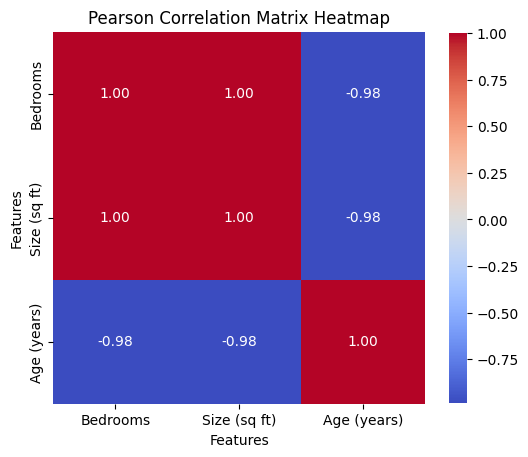

In [24]:
# Feature names
feature_names = ['Bedrooms', 'Size (sq ft)', 'Age (years)']

# Call the function to plot the Pearson correlation matrix
plot_correlation_matrix(houses, feature_names)

### QR Decomposition

You could apply QR decomposition to decompose the houses matrix into an orthogonal matrix Q and an upper triangular matrix R.

Why apply this: QR decomposition is useful when solving systems of linear equations or when performing least-squares fitting (which is at the core of linear regression).

How to apply: Decompose the houses matrix using QR decomposition.

In [25]:
Q, R = np.linalg.qr(houses)
print("Q matrix:", Q)

Q matrix: [[-0.55708601 -0.15161961 -0.81649658]
 [-0.37139068 -0.83390785  0.40824829]
 [-0.74278135  0.53066863  0.40824829]]


In [26]:
print("R matrix:", R)

R matrix: [[-5.38516481e+00 -3.52821143e+03 -1.67125804e+01]
 [ 0.00000000e+00 -2.27429413e+02 -1.55410099e+01]
 [ 0.00000000e+00  0.00000000e+00  2.04124145e+00]]


### Eigenvalues and Eigen vectors

You could compute the eigenvalues and eigenvectors of the covariance matrix to analyze the principal components of the features.

Why apply this: Eigenvalues and eigenvectors help in understanding the direction of maximum variance in the data, which is the foundation of Principal Component Analysis (PCA). This is useful for feature reduction.
How to apply this: Compute the eigenvalues and eigenvectors of the covariance matrix.

In [27]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)


Eigenvalues: [2.50057250e+05 7.89523193e-15 2.08286469e+00]


In [28]:
print("Eigenvectors:\n", eigenvectors)

Eigenvectors:
 [[ 1.99977104e-03  9.99998000e-01  2.99967555e-05]
 [ 9.99885518e-01 -1.99999600e-03  1.49983777e-02]
 [-1.49984077e-02  3.82285592e-16  9.99887518e-01]]


#### Visualising the Orthogonal matrix for Principal Components

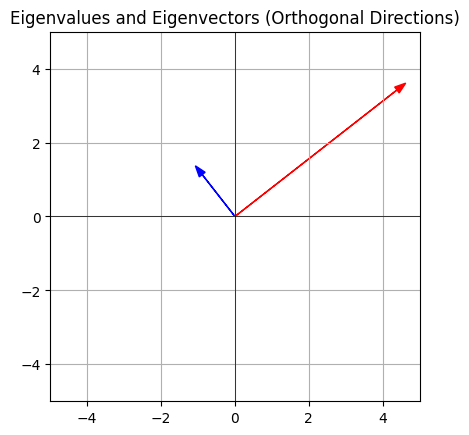

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Example covariance matrix (could be derived from your dataset)
cov_matrix = np.array([[4, 2],
                       [2, 3]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Plotting the eigenvectors
origin = np.array([0, 0])  # Origin point (0,0)
fig, ax = plt.subplots()

# Plot the eigenvectors scaled by their corresponding eigenvalues
for i in range(len(eigenvalues)):
    eigenvector = eigenvectors[:, i]
    ax.arrow(origin[0], origin[1], eigenvector[0] * eigenvalues[i], eigenvector[1] * eigenvalues[i],
             head_width=0.2, head_length=0.3, fc=['r', 'b'][i], ec=['r', 'b'][i])

# Set up the plot to have equal scaling
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal')

plt.title("Eigenvalues and Eigenvectors (Orthogonal Directions)")
plt.grid()
plt.show()


The visualization of eigenvectors and eigenvalues provides important insights into how your data is distributed, and it helps you understand the principal directions (or axes) of maximum variance. Let's break down what this plot tells us:

1. Eigenvectors (Arrows in the Plot)
What They Represent: Each arrow represents an eigenvector, which is a principal direction in which the data varies the most. In the context of your dataset (e.g., features like Bedrooms, Size, and Age), each eigenvector is a linear combination of these original features.
Interpretation: These eigenvectors point in the direction where the data has the highest variance (spread). This means that along these axes, the data points are more spread out.
2. Eigenvalues (Length of the Arrows)
What They Represent: The length of each arrow is determined by the corresponding eigenvalue, which quantifies how much variance exists along that eigenvector's direction.
Interpretation: Longer arrows correspond to higher eigenvalues, meaning that more of the data's variance is explained by that direction. Shorter arrows indicate that less variance is captured along that axis.
For example, if one arrow is much longer than the other, it means most of the variability in the data can be explained by that one direction (axis). In such cases, the data might be largely one-dimensional, meaning you could reduce dimensionality without losing much information.
3. Orthogonality of Eigenvectors
What They Represent: The eigenvectors are orthogonal, meaning they are at right angles to each other. This indicates that the principal components are uncorrelated, which is a key feature in Principal Component Analysis (PCA).
Interpretation: The orthogonality implies that the variance along one principal direction is independent of the variance along another direction. This is important for feature reduction because it ensures that the new feature space (spanned by the eigenvectors) captures the most significant patterns in the data without redundancy.
Key Takeaways from the Plot
Which directions are most important: The eigenvectors show you the principal axes along which the data has the most variance. These directions are the most "important" because they capture the most information about the variability in your dataset.
How much variance each direction captures: The eigenvalues (arrow lengths) tell you how much variance is captured by each eigenvector. If one eigenvalue is much larger than the others, it means that most of the data's variability is along that axis, and you might be able to reduce the dimensionality of your dataset without losing much information.
Dimensionality Reduction Potential: If one eigenvalue is much larger than the rest, it suggests that the data is effectively concentrated along one direction. This insight allows you to potentially reduce the dimensionality of your dataset by focusing on the most important eigenvectors (principal components) and ignoring those with small eigenvalues.
How This is Useful in Practice (Principal Component Analysis - PCA)
In machine learning or data analysis, eigenvalues and eigenvectors are used in PCA to:

Reduce dimensionality: By selecting the eigenvectors with the largest eigenvalues, you can project your data into a lower-dimensional space. This retains the most important variance in the data while discarding less significant details, reducing computational complexity and noise.
Feature extraction: The eigenvectors (principal components) represent combinations of the original features that best explain the variance in the data, making them more informative than the original features.
Example: Let's say you're analyzing a housing dataset with features like Bedrooms, Size, and Age. After plotting the eigenvectors and eigenvalues:
If one eigenvector (say the one corresponding to Size) has a much larger eigenvalue than the others, this suggests that Size is the most significant feature explaining variability in house prices. In this case, the other features like Bedrooms or Age may contribute less to the variation in house prices.

You could decide to reduce dimensionality by projecting the data onto just the top principal components (the eigenvectors with the highest eigenvalues), simplifying your model while retaining most of the useful information.
